In [278]:
#Frameworks

#Lib para data e hora
import datetime;
import pandas as pd

#Lib para o OS da máquina
import os 
import platform
import win32com.client as win32

#Lib para conexão de internet
import requests
import socket

#Lib para API Yahoo Finance
import yfinance as yf
import pandas_datareader.data as web
import matplotlib.pyplot as plt


#Ignorar Avisos
import warnings
warnings.filterwarnings('ignore')

#Lib para SQL
import sqlite3

In [279]:
#Rotinas Iniciais

#Nome rotinas
Id_rotina = 1 #A rotina é uma "etapa" do processo"
Nome_Rotina = 'Fluxo de dados corretora'

#Identificar usuário:
#Função para colocar todas as informações capturadas dentro de variáveis
def Identificando_Usuario():
    
    #Capturar o usuário, a máquina e o sistema operacional:

    #Busca o nome de usuário do computador
    Usuario = os.environ.get('USERNAME')
    
    #Busca a máquina que está acessando a requisição
    Maquina = platform.node()
    
    #Busca o Sistema operacional do usuário
    Sistema_Operacional = platform.platform()

    #Retorna o resultado da função que capturou o nome, a maquina e o SO do usuário
    return (Usuario, Maquina, Sistema_Operacional )


#Identificar o início - quando ela começou essa requisição?
def Inicio_Rotina():

    #Data de Inicio
    Data_Inicio = datetime.datetime.today().date() #Captura a data de hoje e coloca no formato de data (ANO/DIA/MES)

    #Hora de Inicio
    Hora_Inicio = datetime.datetime.today().now() #Captura a data de hoje e coloca no formato de data (ANO/DIA/MES) + a hora de início da requisição

    #Retorno
    return(Data_Inicio, Hora_Inicio )


def Termino_Rotina():

    #Data de Inicio
    Data_Fim = datetime.datetime.today().date() #Captura a data de hoje e coloca no formato de data (ANO/DIA/MES)

    #Hora de Inicio
    Hora_Fim = datetime.datetime.today().now() #Captura a data de hoje e coloca no formato de data (ANO/DIA/MES) + a hora de início da requisição

    #Retorno
    return(Data_Fim, Hora_Fim )
    

#Verificando conexão com a internet
def Verificar_Conexao():

    #String criada com a URL do google
    URL = "https://google.com"
    
    #Tempo para ele ficar testando a conexão antes de falhar
    Timeout = 5

    #O try e o except serão os "testers", se o request der certo, ele retorna True, se ele falhar, retorna False
    try:
        #Teste de conexão tentando acessar o site do google, se ele conseguir, retorna com um "Response", senão, com um erro. O timeout tentará por 5s antes de dar erro
        requests.get( URL, timeout=Timeout )
        return True
        
    except:
        return False

#Identificando o IP do usuário
#A biblioteca socket junto com o "gethostbyname", puxa o endereço de IP do usuário, porém, caso ele esteja desconectado, ele puxa o IP local "gethostname"

def Identificando_IP():

    try:
        #Identificando o IP
        IP_Local = socket.gethostbyname(socket.gethostname())
        return IP_Local

    except:
        return False


#Cria uma lista com a função que armazena os dados do usuário e testa a conexão
Lista_Usuario = Identificando_Usuario()
Lista_Inicio = Inicio_Rotina()
Lista_Fim = Termino_Rotina()
Conexao_Internet = Verificar_Conexao()
Verificando_IP = Identificando_IP()

    
#Colocar todos os erros que acontecem no processo dentro desta lista
Erro_Operacional = ''

#Retorna a lista com as infos do usuário
print(
    Lista_Usuario,
    Lista_Inicio,
    Lista_Fim,
    Conexao_Internet,
    Verificando_IP,
)

('João Pedro', 'DESKTOP-GT9BVV9', 'Windows-10-10.0.19045-SP0') (datetime.date(2025, 2, 22), datetime.datetime(2025, 2, 22, 0, 25, 56, 49838)) (datetime.date(2025, 2, 22), datetime.datetime(2025, 2, 22, 0, 25, 56, 49838)) True 192.168.0.109


In [280]:
#Esta etapa fará com que todos os erros da automaçõo sejam armazenados dentro da variável "Erro_Operacional", que é mostrado no final da tabela.


[*********************100%***********************]  1 of 1 completed


2025-02-22 00:47:25.781050


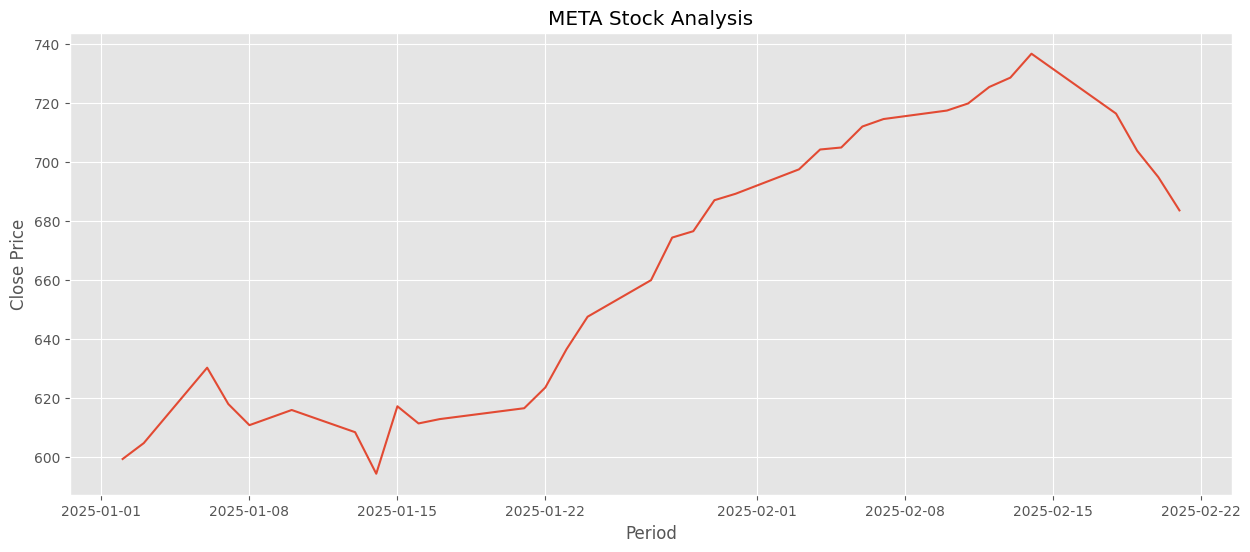

In [285]:
#Operacional
try:
        #Pegando os dados da API do Yahoo Finance
        Base_Dados = yf.download('META', start='2025-01-01')
        Eixo_Plot = Base_Dados['Close']
        Data_Dash = datetime.datetime.today()
        print(Data_Dash)

        #Plot gráfico

        #Tamanho
        plt.figure(figsize=(15,6) )

        #Estilo
        plt.style.use('ggplot')

        #Plot do gráfico
        plt.plot(Eixo_Plot)

        #Labels, Título
        plt.title('META Stock Analysis')
        plt.xlabel('Period')
        plt.ylabel('Close Price')

        #Exportar
        plt.savefig(f'Indicador_Ações_{Data_Dash.strftime("%Y-%m-%d_%H-%M-%S")}.png')
        plt.show()
        

except:
    Erro_Operacional = 'Erro_Conexão'



In [282]:
#Termino da Rotina

Lista_fim = Termino_Rotina()

#Organização

Dicionario = {
    'Id_Rotina' : Id_rotina,
    'Nome_Rotina' : Nome_Rotina,
    'Usuario' : Lista_Usuario[0],
    'Maquina' : Lista_Usuario[1],
    'Sistema_Operacional' : Lista_Usuario[2],
    'Data_Inicio' : Lista_Inicio [0],
    'Horario_Inicio' : Lista_Inicio [1],
    'Teste_Conexao' : Conexao_Internet,
    'IP_Local' : Verificando_IP,
    'Data_Termino' : Lista_Termino[0],
    'Horario_Termino' : Lista_Termino[1],
    'Tempo_Execucao' : (Lista_Termino[1] - Lista_Inicio[1]),
    'Erro' : Erro_Operacional
    
}

#Tab log

Tabela_Log = pd.DataFrame(Dicionario, index=[0])

#Fazer conexão com SQL

#Criar a conexão
Conexao = sqlite3.connect('Banco_Dados.db')

#Apontar a conexão
Cursor = Conexao.cursor()

#Enviar as informações da Tabela_Log
Tabela_Log.to_sql(
    #Nome da tabela
    'Tabela_Processamento',

    #Conexao
    Conexao,

    #Se a tabela existe
    if_exists = 'append',

    #Ignorar o index (O auto incremento do pandas)
    index = False
)

1

In [283]:
pd.read_sql(
    #Query
    'SELECT * FROM Tabela_Processamento',
    Conexao
)

,Id_Rotina,Nome_Rotina,Usuario,Maquina,Sistema_Operacional,Data_Inicio,Horario_Inicio,Teste_Conexao,IP_Local,Data_Termino,Horario_Termino,Tempo_Execucao,Erro
0,1,Fluxo de dados corretora,João Pedro,DESKTOP-GT9BVV9,Windows-10-10.0.19045-SP0,2025-02-21,2025-02-21 23:49:37.603489,1,192.168.0.109,2025-02-21,2025-02-21 21:58:54.505686,-6643097803,
1,1,Fluxo de dados corretora,João Pedro,DESKTOP-GT9BVV9,Windows-10-10.0.19045-SP0,2025-02-22,2025-02-22 00:03:13.211004,1,192.168.0.109,2025-02-21,2025-02-21 21:58:54.505686,-7458705318,
2,1,Fluxo de dados corretora,João Pedro,DESKTOP-GT9BVV9,Windows-10-10.0.19045-SP0,2025-02-22,2025-02-22 00:03:17.015563,1,192.168.0.109,2025-02-21,2025-02-21 21:58:54.505686,-7462509877,
3,1,Fluxo de dados corretora,João Pedro,DESKTOP-GT9BVV9,Windows-10-10.0.19045-SP0,2025-02-22,2025-02-22 00:03:39.696051,0,127.0.0.1,2025-02-21,2025-02-21 21:58:54.505686,-7485190365,
4,1,Fluxo de dados corretora,João Pedro,DESKTOP-GT9BVV9,Windows-10-10.0.19045-SP0,2025-02-22,2025-02-22 00:03:51.325957,0,127.0.0.1,2025-02-21,2025-02-21 21:58:54.505686,-7496820271,
5,1,Fluxo de dados corretora,João Pedro,DESKTOP-GT9BVV9,Windows-10-10.0.19045-SP0,2025-02-22,2025-02-22 00:05:25.158940,1,192.168.0.109,2025-02-21,2025-02-21 21:58:54.505686,-7590653254,
6,1,Fluxo de dados corretora,João Pedro,DESKTOP-GT9BVV9,Windows-10-10.0.19045-SP0,2025-02-22,2025-02-22 00:05:38.848510,0,127.0.0.1,2025-02-21,2025-02-21 21:58:54.505686,-7604342824,
7,1,Fluxo de dados corretora,João Pedro,DESKTOP-GT9BVV9,Windows-10-10.0.19045-SP0,2025-02-22,2025-02-22 00:23:45.070550,1,192.168.0.109,2025-02-21,2025-02-21 21:58:54.505686,-8690564864,
8,1,Fluxo de dados corretora,João Pedro,DESKTOP-GT9BVV9,Windows-10-10.0.19045-SP0,2025-02-22,2025-02-22 00:25:49.688204,1,192.168.0.109,2025-02-21,2025-02-21 21:58:54.505686,-8815182518,
9,1,Fluxo de dados corretora,João Pedro,DESKTOP-GT9BVV9,Windows-10-10.0.19045-SP0,2025-02-22,2025-02-22 00:25:56.049838,1,192.168.0.109,2025-02-21,2025-02-21 21:58:54.505686,-8821544152,
